# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

На этом уроке мы продолжим исследовать линейные модели,  
узначем, зачем для линейных моделей нужно масштабировать признаки,  
реализуем свою линейную регрессию с регуляризацией  
и усовршенствуем наш алгоритм градиентного спуска, сделав его стохастическим.  
Поехали!

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]]).T

In [34]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
y.shape

(10,)

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [35]:
X[:,1].min(), X[:,1].max()

(0, 10)

In [36]:
X[:,2].min(), X[:,2].max()

(450, 2000)

In [37]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [38]:
X_norm[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())
X_norm

array([[1.00e+00, 1.00e-01, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e-01, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e-01, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e-01, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e-01, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e-01, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 1.00e+03, 2.00e+00]])

In [39]:
X_norm[:,2] = (X[:,2] - X[:,2].min()) / (X[:,2].max() - X[:,2].min())
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.1       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

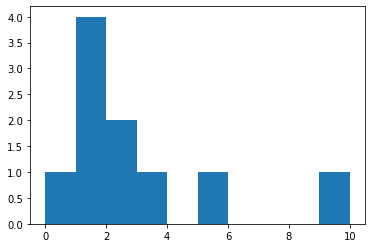

In [40]:
plt.hist(X[:,1]);

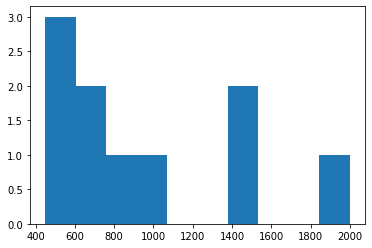

In [41]:
plt.hist(X[:,2]);

In [42]:
X1_mean = X[:,1].mean()
X1_mean

2.6

In [43]:
X1_std = X[:,1].std()
X1_std

2.8000000000000003

In [44]:
X_st = X.copy().astype(np.float64)

In [45]:
X_st[:,1] = (X[:,1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00, -5.71428571e-01,  5.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  7.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  7.50000000e+02,
         2.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  6.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  1.42857143e-01,  1.45000000e+03,
         2.00000000e+00],
       [ 1.00000000e+00, -9.28571429e-01,  8.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  8.57142857e-01,  1.50000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00,  2.64285714e+00,  2.00000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  4.50000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  1.00000000e+03,
         2.00000000e+00]])

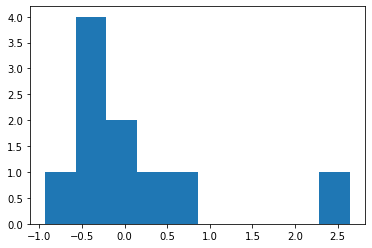

In [46]:
plt.hist(X_st[:,1]);

In [47]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [48]:
X_st[:,2] = custom_StandardScaler(X[:,2])

In [49]:
X_st[:,3] = custom_StandardScaler(X[:,3])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.89625816],
       [ 1.        , -0.57142857, -0.56713087, -0.89625816],
       [ 1.        , -0.21428571, -0.46401617,  0.38411064],
       [ 1.        , -0.57142857, -0.77336028, -0.89625816],
       [ 1.        ,  0.14285714,  0.97958969,  0.38411064],
       [ 1.        , -0.92857143, -0.36090146, -0.89625816],
       [ 1.        ,  0.85714286,  1.08270439,  1.66447944],
       [ 1.        ,  2.64285714,  2.11385144,  1.66447944],
       [ 1.        , -0.57142857, -1.08270439, -0.89625816],
       [ 1.        , -0.21428571,  0.05155735,  0.38411064]])

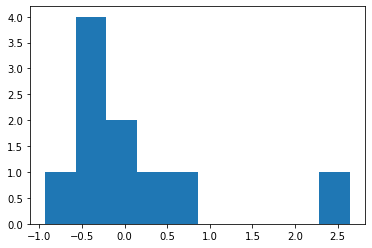

In [50]:
plt.hist(X_st[:,1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [51]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [52]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [53]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 102.00623874163331, веса: [49.75658418  3.52887828  4.22957576  3.84273343]
# итерация: 200, MSE: 41.79560721977369, веса: [56.38633359  4.02831458  3.7864026   3.82349712]
# итерация: 300, MSE: 40.44284213047649, веса: [57.26556801  4.42109853  3.40499094  3.81668036]
# итерация: 400, MSE: 40.22035927480972, веса: [57.38217169  4.73740383  3.08462566  3.8245351 ]
# итерация: 500, MSE: 40.08140691542881, веса: [57.39763562  4.99274669  2.81571789  3.84132848]
# итерация: 600, MSE: 39.986791202638024, веса: [57.39968644  5.19934739  2.59011998  3.86306684]
# итерация: 700, MSE: 39.92198573291186, веса: [57.39995842  5.36687733  2.4009446   3.88703535]
# итерация: 800, MSE: 39.87745863703043, веса: [57.39999449  5.50301087  2.24237745  3.91143457]
# итерация: 900, MSE: 39.84678521599847, веса: [57.39999927  5.61385361  2.10951578  3.93511425]
# итерация: 1000, MSE: 39.8256094441331, веса: [57.3999999   5.7042758   1.99822972  3.95737956]


array([57.3999999 ,  5.7042758 ,  1.99822972,  3.95737956])

In [54]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [55]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 40.7795825243402, веса: [57.39607423  5.54875118  2.29923462  3.83339539]
# итерация: 1000, MSE: 39.30631552119395, веса: [57.39807927  5.91057873  1.77838844  3.99752862]
# итерация: 1500, MSE: 38.69979441213491, веса: [57.39790534  6.05102448  1.56611455  4.07150949]
# итерация: 2000, MSE: 38.45093135336659, веса: [57.39783602  6.10646024  1.47975726  4.10332075]
# итерация: 2500, MSE: 38.3490606415791, веса: [57.39780821  6.12857575  1.44466356  4.11666388]
# итерация: 3000, MSE: 38.307474680518006, веса: [57.39779701  6.13745706  1.43041152  4.12218364]
# итерация: 3500, MSE: 38.290534663615475, веса: [57.39779248  6.14103817  1.42462581  4.12444894]
# итерация: 4000, MSE: 38.28364434167275, веса: [57.39779065  6.1424857   1.42227762  4.1253743 ]
# итерация: 4500, MSE: 38.280844409329845, веса: [57.3977899   6.14307167  1.42132471  4.12575126]
# итерация: 5000, MSE: 38.27970732698867, веса: [57.3977896   6.1433091   1.42093804  4.12590457]


array([57.3977896 ,  6.1433091 ,  1.42093804,  4.12590457])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [56]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [57]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406396, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.78240504280037, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.77852356578891, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617131, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702584, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405893, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321605, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451415, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050766, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406396, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.78240504280037, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.77852356578891, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617131, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702584, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405893, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321605, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451415, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050766, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


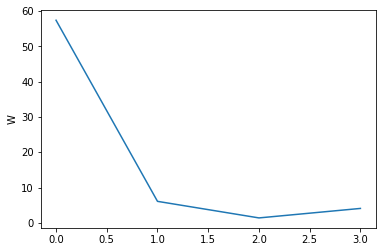

In [58]:
plt.plot(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4))


plt.ylabel('W')
plt.show()

# итерация: 500, MSE: 39.98194500698789, веса: [57.38906081  5.10715051  2.46085098  4.08637112]
# итерация: 1000, MSE: 39.807498454387485, веса: [57.3913912   5.76451498  1.85822318  4.03850468]
# итерация: 1500, MSE: 39.78258436677284, веса: [57.39139129  5.98874999  1.60723534  4.06833123]
# итерация: 2000, MSE: 39.77864355357778, веса: [57.39139129  6.06939455  1.50384706  4.09239133]
# итерация: 2500, MSE: 39.77797824284792, веса: [57.39139129  6.0995982   1.46152978  4.10505578]
# итерация: 3000, MSE: 39.77785715269043, веса: [57.39139129  6.11123921  1.44427397  4.11089809]
# итерация: 3500, MSE: 39.77783224378834, веса: [57.39139129  6.1158124   1.43725313  4.113439  ]
# итерация: 4000, MSE: 39.77782611056078, веса: [57.39139129  6.1176311   1.43440035  4.11451114]
# итерация: 4500, MSE: 39.77782427626161, веса: [57.39139129  6.11835994  1.43324209  4.11495606]
# итерация: 5000, MSE: 39.77782364003346, веса: [57.39139129  6.11865338  1.43277205  4.11513896]


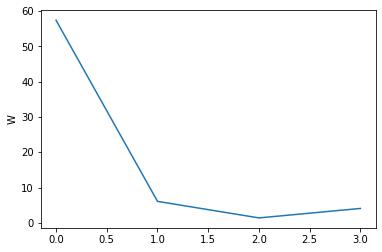

In [59]:

plt.plot(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=3e-4))

plt.ylabel('W')
plt.show()

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

# Домашнее задание:
Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406396, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.78240504280037, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.77852356578891, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617131, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702584, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405893, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321605, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451415, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050766, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


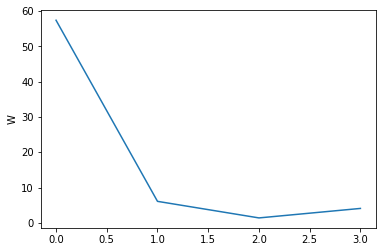

In [60]:
plt.plot(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4))


plt.ylabel('W')
plt.show()


### Не знаю как наложить 2 графика на 1 рисунок, плюс у меня не смотря на то что Lambda разная в обоих случаях, веса 
#### почти одинаковые 

# итерация: 500, MSE: 39.983448448078924, веса: [57.36899299  5.1053032   2.46251946  4.08505036]
# итерация: 1000, MSE: 39.80895827777616, веса: [57.37131425  5.75982044  1.86287557  4.03701148]
# итерация: 1500, MSE: 39.78374222222048, веса: [57.37131434  5.98226846  1.61399522  4.06649131]
# итерация: 2000, MSE: 39.77959810965573, веса: [57.37131434  6.06198048  1.51183169  4.09024351]
# итерация: 2500, MSE: 39.77883304232006, веса: [57.37131434  6.09172769  1.47016155  4.10270881]
# итерация: 3000, MSE: 39.77866808888382, веса: [57.37131434  6.10315196  1.45322897  4.10844036]
# итерация: 3500, MSE: 39.77862478316077, веса: [57.37131434  6.10762411  1.44636373  4.11092464]
# итерация: 4000, MSE: 39.77861109848802, веса: [57.37131434  6.10939637  1.44358392  4.11196928]
# итерация: 4500, MSE: 39.77860619483076, веса: [57.37131434  6.11010409  1.44245925  4.11240129]
# итерация: 5000, MSE: 39.778604316493336, веса: [57.37131434  6.11038803  1.44200443  4.11257825]


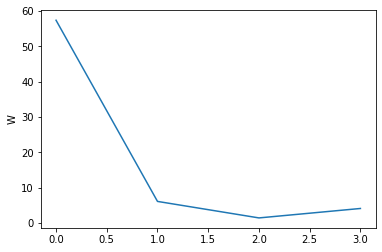

In [61]:
lambda_lst = np.linspace(1e-3, 10, 100)
plt.plot(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_= 1e-3))

plt.ylabel('W')
plt.show()

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
Ответ "ДА"  если уместна нормализация от 0 до 1

#### Написать L1

In [65]:
def eval_model_reg3(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W/(abs(W))) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

# итерация: 500, MSE: 39.98154848340184, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257850025, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.782340657728625, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.778489059590356, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875844, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799424, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.777746579594755, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528787, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]


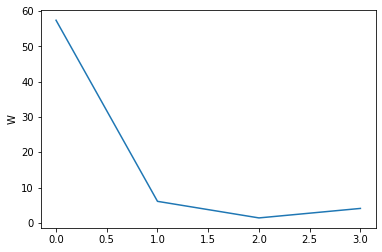

# итерация: 500, MSE: 40.510313811857074, веса: [56.89768611  4.92177763  2.30495483  3.88615812]
# итерация: 1000, MSE: 40.33244983988355, веса: [56.89999991  5.57226266  1.71473068  3.83259755]
# итерация: 1500, MSE: 40.30559147409465, веса: [56.9         5.79392621  1.4683852   3.8602896 ]
# итерация: 2000, MSE: 40.30060024118863, веса: [56.9         5.87360425  1.36672013  3.88356945]
# итерация: 2500, MSE: 40.29946144138091, веса: [56.9         5.90344644  1.32503686  3.89595271]
# итерация: 3000, MSE: 40.299139251824194, веса: [56.9         5.91495375  1.3080119   3.90169472]
# итерация: 3500, MSE: 40.299030928420514, веса: [56.9         5.91947822  1.30107407  3.90420022]
# итерация: 4000, MSE: 40.298990553523005, веса: [56.9         5.92127951  1.29825065  3.90526002]
# итерация: 4500, MSE: 40.29897473223868, веса: [56.9         5.92200226  1.29710256  3.90570072]
# итерация: 5000, MSE: 40.29896839687735, веса: [56.9         5.92229365  1.29663593  3.90588221]


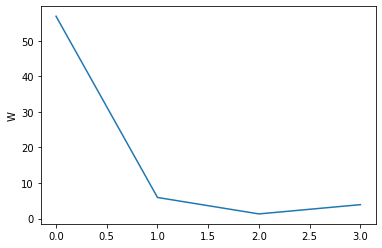

# итерация: 500, MSE: 42.080996431752084, веса: [56.39770662  4.73561243  2.14977511  3.68537817]
# итерация: 1000, MSE: 41.89998501525628, веса: [56.39999991  5.37799386  1.57323815  3.62604874]
# итерация: 1500, MSE: 41.871180109011746, веса: [56.4         5.59631566  1.33244376  3.65145653]
# итерация: 2000, MSE: 41.86510670472836, веса: [56.4         5.67462418  1.23303131  3.67382293]
# итерация: 2500, MSE: 41.86347454695228, веса: [56.4         5.70390715  1.19226246  3.68583869]
# итерация: 3000, MSE: 41.86294174226518, веса: [56.4         5.71518661  1.17560878  3.69143228]
# итерация: 3500, MSE: 41.862745860812964, веса: [56.4         5.71961836  1.16882171  3.69387771]
# итерация: 4000, MSE: 41.86266951199527, веса: [56.4         5.72138195  1.16605952  3.69491316]
# итерация: 4500, MSE: 41.86263899260592, веса: [56.4         5.72208937  1.16493629  3.69534398]
# итерация: 5000, MSE: 41.862626668534055, веса: [56.4         5.72237454  1.16447976  3.69552146]


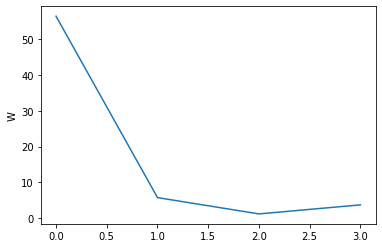

# итерация: 500, MSE: 44.69359634308679, веса: [55.89772714  4.54944724  1.9945954   3.48459823]
# итерация: 1000, MSE: 44.50972810461844, веса: [55.89999991  5.18372507  1.43174562  3.41949992]
# итерация: 1500, MSE: 44.47910656247996, веса: [55.9         5.39870511  1.19650232  3.44262346]
# итерация: 2000, MSE: 44.47200845020965, веса: [55.9         5.4756441   1.0993425   3.46407642]
# итерация: 2500, MSE: 44.46990703547256, веса: [55.9         5.50436785  1.05948807  3.47572466]
# итерация: 3000, MSE: 44.46917352671737, веса: [55.9         5.51541946  1.04320567  3.48116984]
# итерация: 3500, MSE: 44.46889413197691, веса: [55.9         5.5197585   1.03656936  3.4835552 ]
# итерация: 4000, MSE: 44.46878345501157, веса: [55.9         5.52148439  1.03386839  3.4845663 ]
# итерация: 4500, MSE: 44.46873890638955, веса: [55.9         5.52217649  1.03277003  3.48498725]
# итерация: 5000, MSE: 44.46872086532893, веса: [55.9         5.52245543  1.0323236   3.48516072]


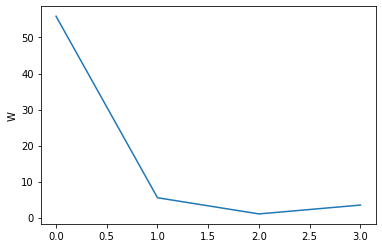

# итерация: 500, MSE: 48.34811354586132, веса: [55.39774765  4.36328205  1.83941568  3.28381828]
# итерация: 1000, MSE: 48.161679107970045, веса: [55.39999991  4.98945627  1.29025309  3.2129511 ]
# итерация: 1500, MSE: 48.129370834499184, веса: [55.4         5.20109456  1.06056087  3.23379038]
# итерация: 2000, MSE: 48.12130547763245, веса: [55.4         5.27666403  0.96565368  3.25432991]
# итерация: 2500, MSE: 48.118758906941835, веса: [55.4         5.30482856  0.92671368  3.26561064]
# итерация: 3000, MSE: 48.11783460518084, веса: [55.4         5.31565232  0.91080255  3.2709074 ]
# итерация: 3500, MSE: 48.11747574191226, веса: [55.4         5.31989864  0.904317    3.27323269]
# итерация: 4000, MSE: 48.117332382571995, веса: [55.4         5.32158683  0.90167726  3.27421944]
# итерация: 4500, MSE: 48.1172744735896, веса: [55.4         5.32226361  0.90060376  3.27463052]
# итерация: 5000, MSE: 48.117250987262004, веса: [55.4         5.32253632  0.90016743  3.27479998]


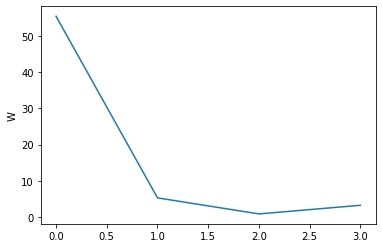

# итерация: 500, MSE: 53.04454804007548, веса: [54.89776816  4.17711686  1.68423597  3.08303833]
# итерация: 1000, MSE: 52.85583802531106, веса: [54.89999991  4.79518747  1.14876055  3.00640228]
# итерация: 1500, MSE: 52.82197292506959, веса: [54.9         5.00348401  0.92461943  3.02495731]
# итерация: 2000, MSE: 52.81299778699679, веса: [54.9         5.07768395  0.83196487  3.04458339]
# итерация: 2500, MSE: 52.810030161359975, веса: [54.9         5.10528927  0.79393929  3.05549662]
# итерация: 3000, MSE: 52.8089249776555, веса: [54.9         5.11588518  0.77839943  3.06064496]
# итерация: 3500, MSE: 52.808490690618974, веса: [54.9         5.12003878  0.77206465  3.06291018]
# итерация: 4000, MSE: 52.808316294676466, веса: [54.9         5.12168926  0.76948613  3.06387259]
# итерация: 4500, MSE: 52.808245694206065, веса: [54.9         5.12235072  0.7684375   3.06427378]
# итерация: 5000, MSE: 52.808217034333246, веса: [54.9         5.12261721  0.76801126  3.06443924]


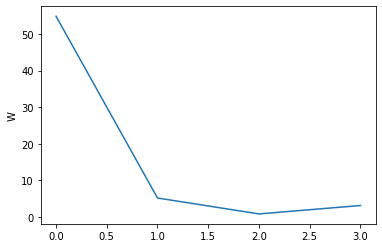

# итерация: 500, MSE: 58.78289982572943, веса: [54.39778867  3.99095166  1.52905625  2.88225839]
# итерация: 1000, MSE: 58.5922048566416, веса: [54.39999991  4.60091867  1.00726802  2.79985346]
# итерация: 1500, MSE: 58.55691283419105, веса: [54.4         4.80587346  0.78867799  2.81612424]
# итерация: 2000, MSE: 58.54708537830267, веса: [54.4         4.87870387  0.69827605  2.83483688]
# итерация: 2500, MSE: 58.54372079872705, веса: [54.4         4.90574998  0.6611649   2.84538259]
# итерация: 3000, MSE: 58.54244464414138, веса: [54.4         4.91611803  0.64599631  2.85038252]
# итерация: 3500, MSE: 58.54193897809715, веса: [54.4         4.92017892  0.63981229  2.85258767]
# итерация: 4000, MSE: 58.54173519132498, веса: [54.4         4.9217917   0.637295    2.85352573]
# итерация: 4500, MSE: 58.54165256823895, веса: [54.4         4.92243784  0.63627123  2.85391705]
# итерация: 5000, MSE: 58.54161900654266, веса: [54.4         4.9226981   0.63585509  2.85407849]


KeyboardInterrupt: 

In [66]:
lambda_lst = np.linspace(1e-3, 10, 100)
for i in range(len(lambda_lst)):
    plt.plot(eval_model_reg3(X_st, y, iterations=5000, alpha=1e-2, lambda_= i))

    plt.ylabel('W')
    plt.show()

In [ ]:
lambda_lst = np.linspace(1e-3, 10, 100)
for i in lambda_lst:
    plt.plot(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_= i))

    plt.ylabel('W')
    plt.show()